In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('FirstIPL.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
##----Data Cleaning-------
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
df_new=df.drop(columns={'mid','striker','non-striker','bowler','batsman','venue'},axis=1)

In [5]:
df_new.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [7]:
df_new['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
df_new['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [9]:
df_new['total'].agg([max,min,'mean'])

max     263.000000
min      67.000000
mean    160.901452
Name: total, dtype: float64

In [10]:
every_season_team=['Royal Challengers Bangalore','Kolkata Knight Riders','Mumbai Indians','Chennai Super Kings',
                   'Rajasthan Royals','Sunrisers Hyderabad','Kings XI Punjab','Delhi Daredevils']


In [11]:
df_new=df_new[(df_new['bat_team'].isin(every_season_team))& (df_new['bowl_team'].isin(every_season_team))]

In [12]:
df_new.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
df_new=df_new[df_new['overs']>6]

In [16]:
df_new.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,62,1,6.1,55,1,222
39,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,63,1,6.2,52,1,222
40,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,64,1,6.3,47,1,222
41,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,66,1,6.4,45,1,222
42,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,67,1,6.5,46,1,222


In [18]:
from datetime import datetime
df_new['date']=df_new['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))

In [ ]:
## One Hot Encoding

In [21]:
df_new=pd.get_dummies(columns={'bat_team','bowl_team'},data=df_new,drop_first=True)

In [22]:
df_new.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,...,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
38,2008-04-18,62,1,6.1,55,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
39,2008-04-18,63,1,6.2,52,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
40,2008-04-18,64,1,6.3,47,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
41,2008-04-18,66,1,6.4,45,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0
42,2008-04-18,67,1,6.5,46,1,222,0,0,1,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='overs', ylabel='runs'>

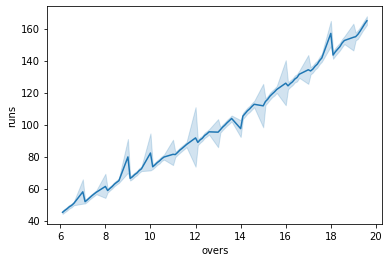

In [27]:
sns.lineplot(x=df_new['overs'],y=df_new['runs'],data=df_new)

In [37]:
## splitting the data
x_train=df_new[df_new['date'].dt.year<=2016]
x_train.drop(columns={'date'},axis=1,inplace=True)
x_train.drop(columns={'total'},axis=1,inplace=True)


x_test=df_new[df_new['date'].dt.year>=2017]
x_test.drop(columns={'date'},axis=1,inplace=True)
x_test.drop(columns={'total'},axis=1,inplace=True)

In [40]:
y_train=df_new[df_new['date'].dt.year<=2016]
y_train=y_train['total']
y_test=df_new[df_new['date'].dt.year>=2017]
y_test=y_test['total']

In [41]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34779, 19), (2592, 19), (34779,), (2592,))

In [43]:
##---Model Building---##
##Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
lr.score(x_train,y_train)

0.6759768377830212

In [52]:
lr.coef_

array([ 0.96777558, -4.78341319, -6.5253213 , -0.01362201, -0.91687695,
       -2.96751218, -0.40560555, -3.5364897 ,  1.82974153, -4.53863397,
        2.99374447, -0.20553804,  0.85377353,  1.19803056, -3.37724377,
       -0.09908544,  0.26796083,  0.45360545, -0.55469   ])

In [49]:
pred=lr.predict(x_test)
pred

array([179.83560551, 179.19669539, 179.58004887, ..., 101.08299922,
       100.48495511,  94.14575485])

In [45]:
lr.score(x_test,y_test)

0.7718324668686467

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [51]:
print('error:')
print('Mean Absolute_error:',mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))
print('coefficient of determnation (r_2 score)',r2_score(y_test,pred))

error:
Mean Absolute_error: 11.695253373706475
Mean Squared error: 230.30997784005197
Root mean squared error 15.175967113830076
coefficient of determnation (r_2 score) 0.7718324668686467


# Ridge Regression

In [56]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [72]:
ridge=Ridge()
parameter={'alpha':[1e-15,1e-10,1e-3,1e-2,1,5,10,30,50,35]}
ridge_regressor=GridSearchCV(ridge,parameter,scoring='r2',cv=8,)

ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=8, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 0.001, 0.01, 1, 5, 10, 30, 50,
                                   35]},
             scoring='r2')

In [73]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 50}
0.6387571481708161


In [113]:
ridge_regressor.score(x_train,y_train)

0.6759748462708459

In [76]:
prediridge=ridge_regressor.predict(x_test)

In [77]:
print('error:')
print('Mean Absolute_error:',mean_absolute_error(y_test,prediridge))
print('Mean Squared error:',mean_squared_error(y_test,prediridge))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,prediridge)))
print('coefficient of determnation (r_2 score)',r2_score(y_test,prediridge))

error:
Mean Absolute_error: 11.693526899876879
Mean Squared error: 230.32007632166926
Root mean squared error 15.176299823134402
coefficient of determnation (r_2 score) 0.7718224623275469


# Lasso Regression

In [107]:
lasso=Lasso()
param={'alpha':[1e-15,1e-10,1e-5,.1,1,10,20,25,30,35]}
lasso_reg=GridSearchCV(lasso,param,cv=5,scoring='r2')
lasso_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.1, 1, 10, 20, 25, 30,
                                   35]},
             scoring='r2')

In [108]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1}
0.6510335023418762


In [111]:
predlasso=lasso_reg.predict(x_test)

In [112]:
lasso_reg.score(x_test,y_test)

0.7618370765953089

In [114]:
print('error:')
print('Mean Absolute_error:',mean_absolute_error(y_test,predlasso))
print('Mean Squared error:',mean_squared_error(y_test,predlasso))
print('Root mean squared error',np.sqrt(mean_squared_error(y_test,predlasso)))
print('coefficient of determnation (r_2 score)',r2_score(y_test,predlasso))

error:
Mean Absolute_error: 11.78591922041425
Mean Squared error: 240.39922270658542
Root mean squared error 15.50481288847387
coefficient of determnation (r_2 score) 0.7618370765953089


In [118]:
#saving file
import pickle
filename='scorelasso.pkl'
pickle.dump(lasso_reg,open(filename,'wb'))

loaded_model=pickel.load(open(filename,'rb'))

NameError: name 'pickel' is not defined